<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 4, 2020 -->
# Project 1 on Machine Learning, deadline October 4, 2020
<!-- dom:AUTHOR: [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html) at University of Oslo, Norway -->
<!-- Author: -->  
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **Sep 10, 2021**

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method,
The total score is **100** points. Each subtask has its own final score.


We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.


The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as
a resampling technique.  After that we will include the cross-validation technique. As in homeworks 1 and 2, we can use a uniform
distribution to set up the arrays of values for $x$ and $y$, or as in
the example below just a set of fixed 
values for $x$ and $y$ with a given step
size.  We will fit a
function (for example a polynomial) of $x$ and $y$.  Thereafter we
will repeat much of the same procedure using the Ridge and Lasso
regression methods, introducing thus a dependence on the bias
(penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.


The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

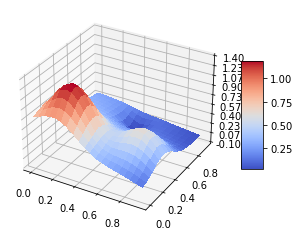

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)


# Plot the surface
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Exercise 1: Ordinary Least Square (OLS) on the (score 10 points)

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $\cal{N}(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) or use your code from
homeworks 1 and 2 and perform a standard least square regression
analysis using polynomials in $x$ and $y$ up to fifth order. Find the
[confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) of the parameters (estimators) $\beta$ by computing their
variances, evaluate the Mean Squared error (MSE)

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\hat{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Your code has to include a scaling of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.


You can easily reuse the solutions to your exercises from week 35 and week 36.




In [2]:
from sklearn.model_selection import train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler




def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def create_X(x, y, n ):
    L = ['1']
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
            if (i == 0 and k == 0) :
                L.append('1')
            elif(i-k == 0):
                L.append('Y^' + str(k))
            elif (k == 0):
                L.append('X^' + str(i-k))
            elif (i==2 and k == 1):
                L.append('XY')
            elif(i-k == 1):
                L.append('X'+'Y^' + str(k))
            elif (k == 1):
                L.append('X^' + str(i-k)+'Y')
            else :
                L.append('X^' + str(i-k)+'Y^'+ str(k))
    return X, L

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def FrankeFunctionWithNoise(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0, 0.1, len(x)*len(x))
    return term1 + term2 + term3 + term4 + noise.reshape(len(x), len(x))

Polynomial degree: 1
MSE training :  0.03251795300828318
MSE test :  0.03865411054974292
R2 training :  0.6279278878182937
R2 test :  0.6527529026613431

 

Polynomial degree: 2
MSE training :  0.025009476000713692
MSE test :  0.032039025084595406
R2 training :  0.7138402728556461
R2 test :  0.7121791627343457

 

Polynomial degree: 3
MSE training :  0.01608464520398582
MSE test :  0.02301644405202145
R2 training :  0.8159586517264507
R2 test :  0.7932330281449149

 

Polynomial degree: 4
MSE training :  0.012034297130250716
MSE test :  0.017652158719655774
R2 training :  0.8623029453688533
R2 test :  0.8414227933333601

 

Polynomial degree: 5
MSE training :  0.009519854394991362
MSE test :  0.014963322568300838
R2 training :  0.8910733301230715
R2 test :  0.8655778064871541

 

Polynomial degree: 6
MSE training :  0.008526794340528134
MSE test :  0.014441704410559586
R2 training :  0.9024359749947611
R2 test :  0.8702637348041877

 

Polynomial degree: 7
MSE training :  0.00781469620

,1,X^1,Y^1,X^2,XY,Y^2,X^3,X^2Y,XY^2,Y^3,...,X^9Y,X^8Y^2,X^7Y^3,X^6Y^4,X^5Y^5,X^4Y^6,X^3Y^7,X^2Y^8,XY^9,Y^10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.396206,-0.153044,-0.183115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.461113,-0.153586,-0.184595,-0.013359,0.071119,-0.047333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.461044,-0.181549,-0.394331,-0.011165,0.071376,-0.047497,0.033007,0.014631,-0.030230,0.107066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.368490,-0.180869,-0.392644,0.210924,0.150789,0.027518,0.031466,0.015570,-0.028705,0.105447,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.366090,-0.136525,-0.537602,0.209256,0.156390,0.031276,0.045155,-0.005453,-0.155108,0.317926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.323447,-0.140709,-0.540865,0.439722,0.221869,0.102006,0.046960,-0.003879,-0.149814,0.320417,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.322323,-0.101984,-0.439355,0.438120,0.223551,0.106069,0.048115,-0.224808,-0.305092,0.130538,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.330625,-0.105120,-0.441333,0.533203,0.279162,-0.023252,0.048332,-0.227937,-0.298307,0.140690,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.333790,-0.048758,-0.268365,0.516272,0.281109,-0.022437,-0.172366,-0.418685,-0.373840,-0.556061,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


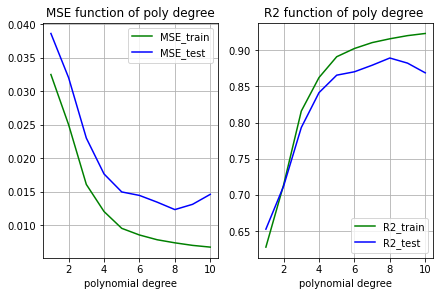

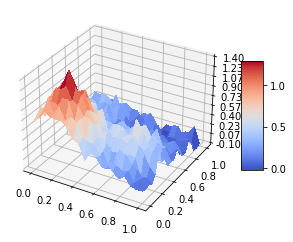

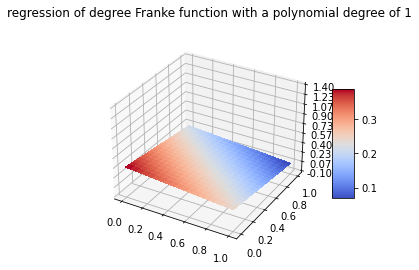

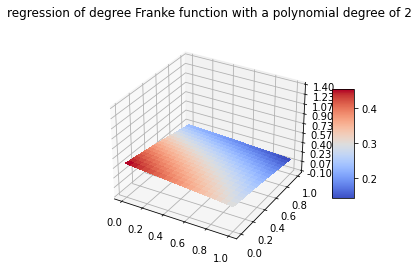

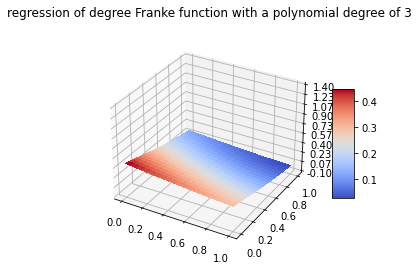

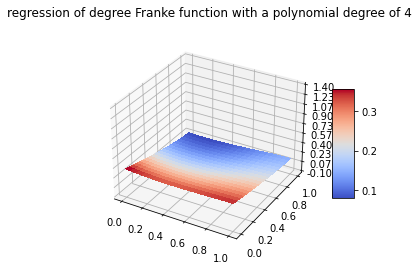

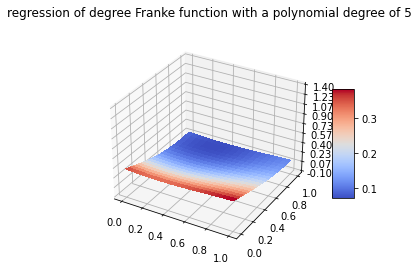

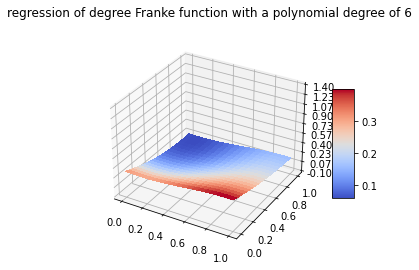

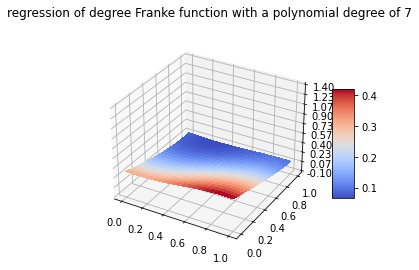

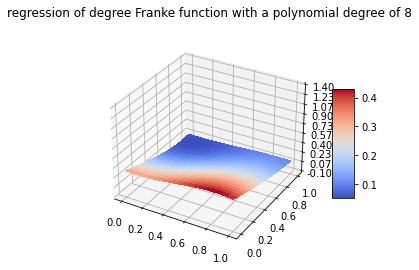

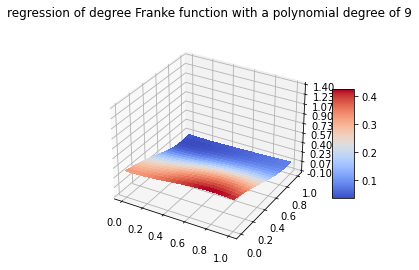

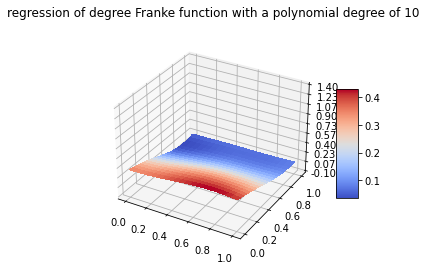

In [5]:

################# Parameters #################

n = 20  #number of data
DegreeMax = 10

#############################################

#Set up the DATA
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = FrankeFunctionWithNoise(x, y)

x_y = np.empty((len(x)*len(x), 2))
x_y[:, 0] = x.ravel()
x_y[:, 1] = y.ravel()

#Scale the DATA
scaler = StandardScaler()
scaler.fit(x_y)
x_y = scaler.transform(x_y)

x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z.ravel(), test_size=0.2)

#Set up the MSE and R2
Liste_degree = range(1, DegreeMax +1)
MSE_train = []
MSE_test = []
R2_train = []
R2_test = []



coeff = int((DegreeMax+1)*(DegreeMax+2)/2)
BETA = np.zeros((DegreeMax+1, coeff))

#PLot the real function 
fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)


#For each polynomial degree
for poly in Liste_degree:

    #Set up the design matrix for train and test data
    X_train, coeff = create_X(x_y_train[:, 0], x_y_train[:, 1], poly )
    X_test, coeff = create_X(x_y_test[:, 0], x_y_test[:, 1], poly )
    X , coeff = create_X(x, y, poly)
    #Compute the beta coefficients
    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)
    
    #Compute our regression
    ztildeOLS = X_train @ beta
    ztestOLS = X_test @ beta
    zplot = X @ beta
    zplot = zplot.reshape(len(x), len(x))

    #Just stock each beta coefficients into a matrix
    for j in range(len(beta)):
        BETA[poly][j] = beta[j]

    MSE_train.append(MSE(z_train, ztildeOLS))
    MSE_test.append(MSE(z_test, ztestOLS))
    R2_train.append(R2(z_train, ztildeOLS))
    R2_test.append(R2(z_test, ztestOLS))

    degree = poly
    print("Polynomial degree:", degree)
    print("MSE training : ", MSE_train[degree - 1])
    print("MSE test : ", MSE_test[degree - 1])
    print("R2 training : ", R2_train[degree - 1])
    print("R2 test : ", R2_test[degree - 1])
    print("\n \n")

    #We plot the solution for each degree
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x, y, zplot, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.suptitle("regression of degree Franke function with a polynomial degree of " + str(degree))
    fig.colorbar(surf, shrink=0.5, aspect=5)


#We plot by subplot the MSE and R2 for train and test data
axs[0].plot(Liste_degree, MSE_train, 'green', label='MSE_train')
axs[0].plot(Liste_degree, MSE_test, 'blue', label='MSE_test')
axs[0].set_title("MSE function of poly degree")
axs[0].set_xlabel("polynomial degree")
axs[0].legend()
axs[0].grid()

axs[1].plot(Liste_degree, R2_train, 'green', label="R2_train")
axs[1].plot(Liste_degree, R2_test, 'blue', label="R2_test")
axs[1].set_title("R2 function of poly degree ")
axs[1].set_xlabel("polynomial degree")
axs[1].legend()
axs[1].grid()

print("---------------------------- beta coefficients for each polynomial degree ----------------------------")
DesignMatrix = pd.DataFrame(BETA)
DesignMatrix.columns = coeff
display(DesignMatrix)

plt.show()